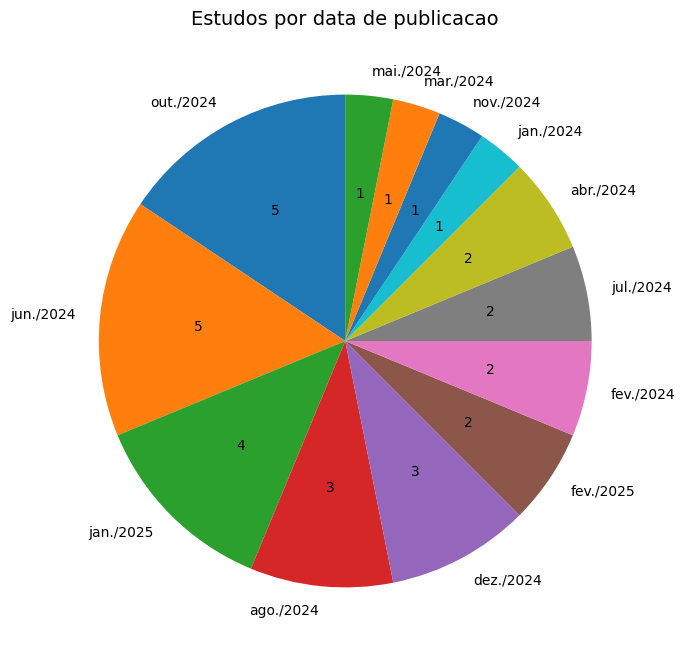

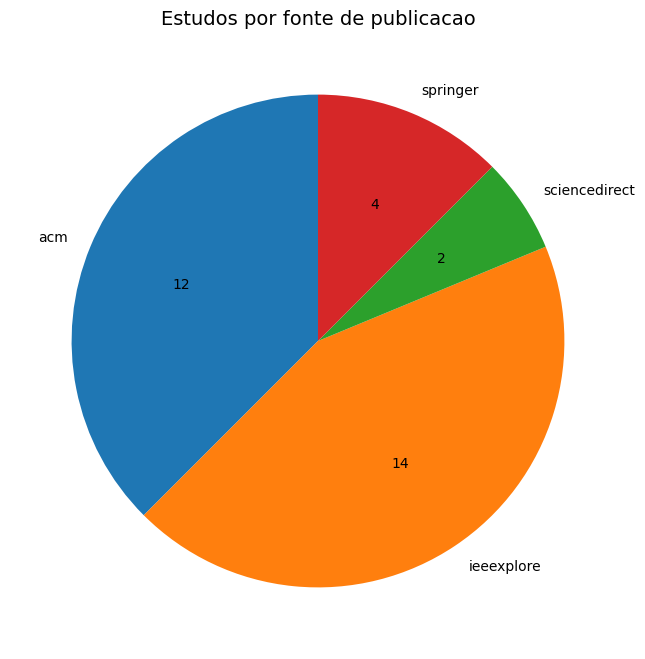

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_publication_date_chart():
    """Generate pie chart for publication dates"""
    df = pd.read_csv('papers.csv')
    plt.figure(figsize=(10, 8))
    publication_counts = df['Publication Date'].value_counts()

    plt.pie(publication_counts.values, labels=publication_counts.index, 
             autopct=lambda pct: f'{int(round(pct * sum(publication_counts.values) / 100))}', 
             startangle=90)
    plt.title('Estudos por data de publicacao', fontsize=14)
    plt.savefig('publication_dates.png', dpi=300, bbox_inches='tight', transparent=False)
    plt.show()

def generate_source_chart():
    """Generate pie chart for source platforms in Link column"""
    df = pd.read_csv('papers.csv')
    plt.figure(figsize=(10, 8))
    
    # Define the substrings to search for
    sources = ['acm', 'ieeexplore', 'sciencedirect', 'springer']
    
    # Initialize counts dictionary
    source_counts = {source: 0 for source in sources}
    
    # Count occurrences of each substring in the Link column
    for link in df['Link'].dropna().str.lower():
        for source in sources:
            if source in link:
                source_counts[source] += 1
    
    # Convert to series for plotting
    source_series = pd.Series(source_counts)
    
    # Only plot if we have data
    if source_series.sum() > 0:
        plt.pie(source_series.values, labels=source_series.index, 
                 autopct=lambda pct: f'{int(round(pct * sum(source_series.values) / 100))}', 
                 startangle=90)
        plt.title('Estudos por fonte de publicacao', fontsize=14)
        plt.savefig('publication_sources.png', dpi=300, bbox_inches='tight', transparent=False)
        plt.show()
    else:
        print("No source data found in Link column")

# Generate both charts
generate_publication_date_chart()
generate_source_chart()